# Problem Set 5

See [Optimization](../scientific/optimization.ipynb), [Introduction](../pandas/intro.ipynb), and [Basic Functionality](../pandas/basics.ipynb)

In [34]:
import pandas as pd
import numpy as np

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

## Setup for Question 1-5

Load data from the [Basic Functionality](../pandas/basics.ipynb) lecture.

In [35]:
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates=["Date"])

And do the same manipulation as in the pandas basics lecture.

In [36]:
states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"
]

unemp = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
    [states]
)

## Question 1

At each date, what is the minimum unemployment rate across all states
in our sample?

In [37]:
# Your code here
unemp.min(axis=1)

Date
2000-01-01    3.3
2000-02-01    3.2
2000-03-01    3.2
2000-04-01    3.3
2000-05-01    3.5
             ... 
2017-08-01    4.0
2017-09-01    3.9
2017-10-01    3.9
2017-11-01    3.9
2017-12-01    3.9
Length: 216, dtype: float64

What was the median unemployment rate in each state?

In [38]:
# Your code here
unemp.median()

state
Arizona       5.80
California    6.50
Florida       5.35
Illinois      6.15
Michigan      7.00
New York      5.70
Texas         5.40
dtype: float64

What was the maximum unemployment rate across the states in our
sample? In what state did it happen? In what month/year was this
achieved?

- Hint 1: What Python type (not `dtype`) is returned by a reduction?  
- Hint 2: Read documentation for the method `idxmax`.  

In [39]:
# Your code here
print(f"The highest unemployment rate was {unemp.max().max()} in {unemp.max().idxmax()} on {unemp.max(axis=1).idxmax()}")

The highest unemployment rate was 14.6 in Michigan on 2009-06-01 00:00:00


Classify each state as high or low volatility based on whether the
variance of their unemployment is above or below 4.

In [40]:
def volatile(u):
    if (u.var()>4):
        return "high"
    else:
        return "low"

unemp.agg(volatile)

state
Arizona       high
California    high
Florida       high
Illinois       low
Michigan      high
New York       low
Texas          low
dtype: object

## Question 2

Imagine that we want to determine whether unemployment was high (> 6.5),
medium (4.5 < x <= 6.5), or low (<= 4.5) for each state and each month.

Write a Python function that takes a single number as an input and
outputs a single string which notes whether that number is high, medium, or low.

In [41]:
# Your code here
def unempbin(u):
    if u>6.5 :
        return("high")
    elif u>4.5 :
        return("medium")
    else : 
        return("low")    

Pass your function to either `apply` or `applymap` and save the
result in a new DataFrame called `unemp_bins`.

In [42]:
# Your code here
unemp_bins = unemp.applymap(unempbin)

## Question 3

This exercise has multiple parts:

Use another transformation on `unemp_bins` to count how many
times each state had each of the three classifications.

- Hint 1: Will you need to use `apply` or `applymap` for transformation?  
- Hint 2: Try googling “pandas count unique value” or something similar to find the proper transformation.  

In [43]:
# Your code here
unemp_bin_counts=unemp_bins.apply(lambda x: x.value_counts())
unemp_bin_counts=unemp_bin_counts.iloc[[1,2,0],:] # put in nicer order printing and plotting
unemp_bin_counts

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
low,44,4,69,19,17,22,58
medium,97,106,79,106,57,129,107
high,75,106,68,91,142,65,51


Construct a horizontal bar chart to detail the occurrences of each level.
Use one bar per state and classification for 21 total bars.

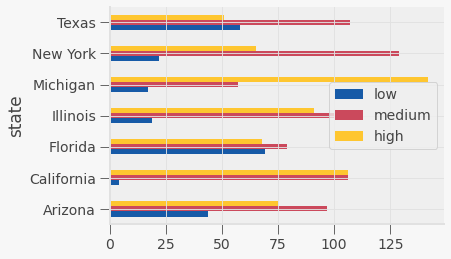

In [46]:
unemp_bin_counts.T.plot.barh()

## Question 4

Repeat Question 3, but count how many states had
each classification in each month. Which month had the most states
with high unemployment? What about medium and low?

Part 1: Write a Python function to classify unemployment levels

In [13]:
# Your code here
# same as Question 3, so won't redefine the function

Part 2: Decide whether you should use `.apply` or `.applymap`.

Part 3: Pass your function from part 1 to the method you determined in Part 2.

In [14]:
#unemp_bins = unemp #replace this comment with your code!!
# Also same as 3, so not redoing

Part 4: Count the number of times each state had each classification.

In [15]:
## then make a horizontal bar chart here
unemp_bin_counts=unemp_bins.apply(lambda x: x.value_counts(), axis=1)
unemp_bin_counts=unemp_bin_counts.iloc[:,[1,2,0]] # put in nicer order printing and plotting
unemp_bin_counts=unemp_bin_counts.fillna(0)
unemp_bin_counts

,low,medium,high
Date,,,
2000-01-01,4.0,3.0,0.0
2000-02-01,4.0,3.0,0.0
2000-03-01,5.0,2.0,0.0
2000-04-01,5.0,2.0,0.0
2000-05-01,5.0,2.0,0.0
...,...,...,...
2017-08-01,2.0,5.0,0.0
2017-09-01,3.0,4.0,0.0
2017-10-01,3.0,4.0,0.0


Part 5: Apply the same transformation from Part 4 to each date instead of to each state.

In [16]:
def findmaxindices(x) :
    return(x.index[x == x.max()])

print(unemp_bin_counts.apply(findmaxindices))

low       DatetimeIndex(['2000-08-01', '2000-09-01', '20...
medium    DatetimeIndex(['2001-09-01', '2001-10-01', '20...
high      DatetimeIndex(['2009-04-01', '2009-05-01', '20...
dtype: object


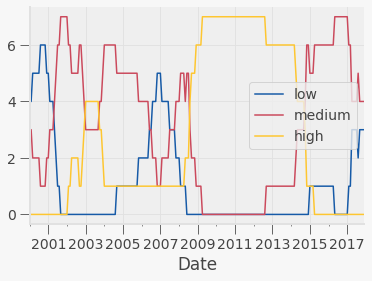

In [17]:
unemp_bin_counts.plot()

## Question 5

For a single state of your choice, determine the mean
unemployment during “Low”, “Medium”, and “High” unemployment times.
(recall your `unemp_bins` DataFrame from the exercise above)

In [29]:
# Your code here
vals = ['low','medium','high']
def condmean(u,bins):
    vals = bins.unique()
    m = pd.Series([u[bins==v].mean() for v in vals], index=vals).sort_values()
    return(m)
        
condmean(unemp['New York'],unemp_bins['New York'])
    

low       4.340909
medium    5.361240
high      8.169231
dtype: float64

Which states in our sample performs the best during “bad times?” To
determine this, compute each state’s mean unemployment in
months where the mean unemployment rate is greater than 7.

In [30]:
def meanbadtimes(u, bad=7):
    return(u[u>=bad].mean())

unemp.agg(meanbadtimes)

state
Arizona        9.007576
California    10.151282
Florida        9.483333
Illinois       9.354286
Michigan       9.229565
New York       8.265574
Texas          7.944118
dtype: float64